In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
#importing dataset
df=pd.read_csv(r"D:\intership2024\Titanic-Dataset.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape


(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#nul land missing
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#age column should be filled
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [9]:
#similarly for embarked col
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
#no of survivers
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
#plotting


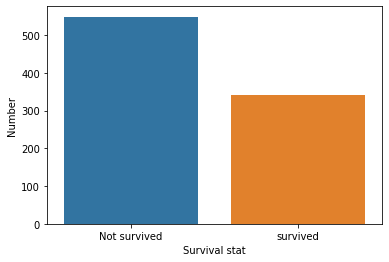

In [13]:
sns.countplot(x='Survived',data=df)
plt.xlabel("Survival stat")
plt.ylabel("Number")
plt.xticks(ticks=[0,1],labels=['Not survived','survived'])
plt.show()

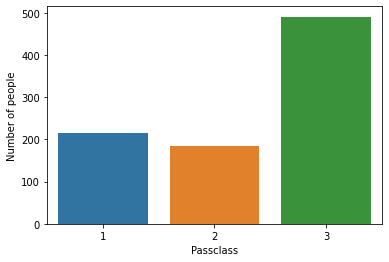

In [14]:
#diffewrent class wise survival
sns.countplot(x='Pclass',data=df)
plt.xlabel("Passclass")
plt.ylabel("Number of people")
plt.show()

In [ ]:
#Most people didn't survive
#Though population of P class 3 was the highest, yet they had the least survival rate

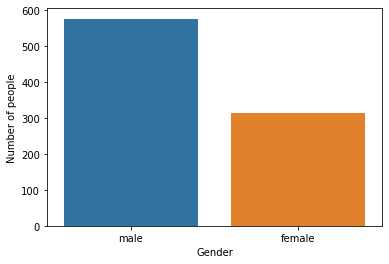

In [15]:
#gender wise in the ship
sns.countplot(x='Sex',data=df,)
plt.xlabel("Gender")
plt.ylabel("Number of people")
plt.show()

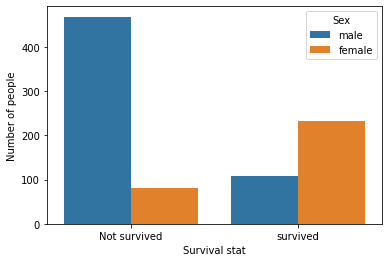

In [16]:
sns.countplot(x='Survived',hue='Sex',data=df)
plt.xlabel("Survival stat")
plt.ylabel("Number of people")
plt.xticks(ticks=[0,1],labels=['Not survived','survived'])
plt.show()

In [ ]:
#survival of female was more


In [ ]:
#categorical has to be made numerical for performing  model training

In [17]:
#sex column 
labelencoder = LabelEncoder()
df['Sex'] = labelencoder.fit_transform(df['Sex'])

In [18]:
#embarked 
df.replace({'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [19]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0


In [21]:
#Model
df_num = df[['Fare','Parch','SibSp','Age','Sex','Pclass','Embarked','Survived']]

In [22]:
#Features
x = df_num.drop(columns=(['Parch','SibSp','Survived']))

In [23]:
# Target
y = df['Survived']

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=2)

In [35]:

model = LogisticRegression()

In [36]:
model.fit(x_train,y_train)


LogisticRegression()

In [37]:
x_train_prediction=model.predict(x_train)

In [38]:
print(x_train_prediction)

[0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0
 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 1
 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1 1 0
 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1
 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0
 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0
 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0
 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 1 0 0 0 0 0 0 0 0 0 

In [39]:
train_data_accuracy=accuracy_score(y_train,x_train_prediction)

In [40]:

print("Accuracy oftraining data: ",train_data_accuracy)

Accuracy oftraining data:  0.8057784911717496


In [41]:
x_test_prediction=model.predict(x_test)

In [42]:
test_data_accuracy=accuracy_score(y_test,x_test_prediction)

In [43]:

print("Accuracy  of test data:",test_data_accuracy)

Accuracy  of test data: 0.7873134328358209


In [ ]:
#Logistic Regression Model for prediction.
#Accuracy Score of train data is 80%
#Accuracy score of test data is 78%